In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("chennai_house_price_prediction.csv")

In [9]:
data.head(10)

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250
5,P00219,Chrompet,1220,36,2.0,1.0,4,Partial,No,Commercial,NoSeWa,No Access,RH,4.5,2.6,3.1,3.320,198316,12394750
6,P09105,Chrompet,1167,137,1.0,1.0,3,Partial,No,Other,AllPub,No Access,RL,3.6,2.1,2.5,2.670,33955,8488790
7,P09679,Velachery,1847,176,3.0,2.0,5,Family,No,Commercial,AllPub,Gravel,RM,2.4,4.5,2.1,3.260,235204,16800250
8,P03377,Chrompet,771,175,1.0,1.0,2,AdjLand,No,Others,NoSewr,Paved,RM,2.9,3.7,4.0,3.550,33236,8308970
9,P09623,Velachery,1635,74,2.0,1.0,4,AbNormal,No,Others,ELO,No Access,I,3.1,3.1,3.3,3.160,121255,8083650


In [5]:
#Relation b/w Price and Area

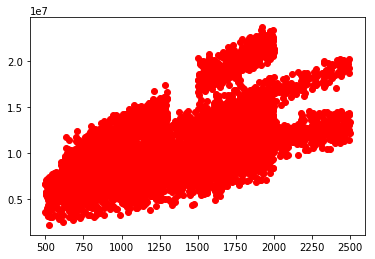

In [8]:
plt.scatter(data["INT_SQFT"],data["SALES_PRICE"],c="r")

In [10]:
data["BUILDTYPE"].value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [11]:
data["BUILDTYPE"].replace({"Other":"Others","Comercial":"Commercial"},inplace=True)

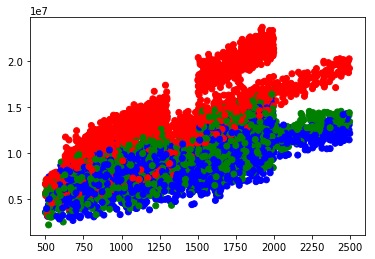

In [12]:
fig,ax=plt.subplots()
color={"House":"blue","Commercial":"r","Others":"green"}
plt.scatter(data["INT_SQFT"],data["SALES_PRICE"],c=data["BUILDTYPE"].apply(lambda x: color[x]))

In [13]:
#Relation b/w Sales price and no. of bedroom and bathroom

In [17]:
data.pivot_table(values="SALES_PRICE",index="N_BEDROOM",columns="N_BATHROOM",aggfunc="median")

N_BATHROOM,1.0,2.0
N_BEDROOM,,
1.0,9168580.0,NaN
2.0,12129780.0,9117500.0
3.0,NaN,11663490.0
4.0,NaN,13172000.0


Text(0.5,1,'QS_OVERALL')

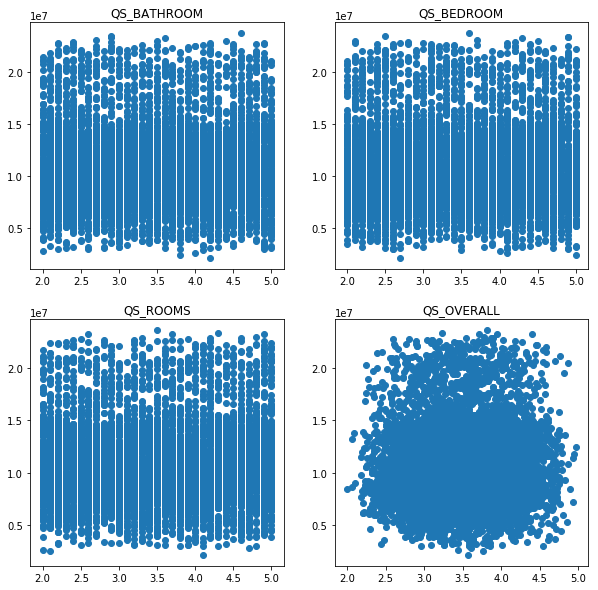

In [26]:
fig,ax=plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(10)
ax[0,0].scatter(data["QS_BATHROOM"],data["SALES_PRICE"])
ax[0,0].set_title("QS_BATHROOM")
ax[0,1].scatter(data["QS_BEDROOM"],data["SALES_PRICE"])
ax[0,1].set_title("QS_BEDROOM")
ax[1,0].scatter(data["QS_ROOMS"],data["SALES_PRICE"])
ax[1,0].set_title("QS_ROOMS")
ax[1,1].scatter(data["QS_OVERALL"],data["SALES_PRICE"])
ax[1,1].set_title("QS_OVERALL")

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\cbook\__init__.py:1872: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\cbook\__init__.py:1879: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\cbook\__init__.py:1887: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\cbook\__init__.py:1888: RuntimeWarning: invalid value encou

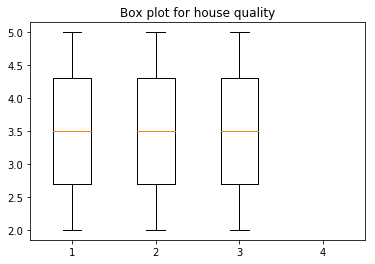

In [30]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.set_title("Box plot for house quality")
bp=ax.boxplot([data["QS_BATHROOM"],data["QS_BEDROOM"],data["QS_ROOMS"],data["QS_OVERALL"]])

In [32]:
data["QS_OVERALL"].isnull().sum()

48

In [33]:
for i in range(0,len(data)):
    if pd.isnull(data["QS_OVERALL"][i])==True:
            data["QS_OVERALL"][i]=(data["QS_BATHROOM"][i]+data["QS_BEDROOM"][i]+data["QS_ROOMS"][i])/3

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


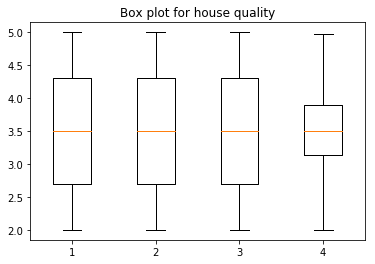

In [34]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.set_title("Box plot for house quality")
bp=ax.boxplot([data["QS_BATHROOM"],data["QS_BEDROOM"],data["QS_ROOMS"],data["QS_OVERALL"]])

In [35]:
data.groupby("BUILDTYPE").SALES_PRICE.median()

BUILDTYPE
Commercial    13356200
House          8985370
Others         9637260
Name: SALES_PRICE, dtype: int64

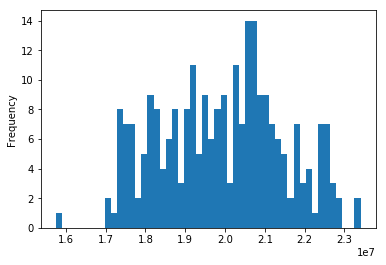

In [37]:
temp=data.loc[(data["BUILDTYPE"]=="Commercial")&(data["AREA"]=="Anna Nagar")]
temp["SALES_PRICE"].plot.hist(bins=50)

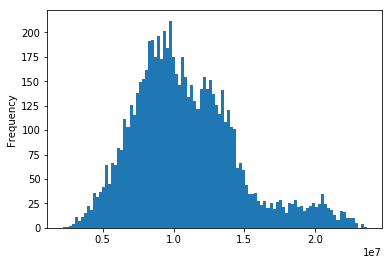

In [38]:
data["SALES_PRICE"].plot.hist(bins=100)

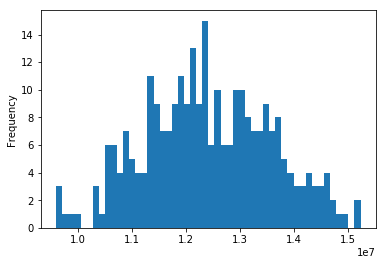

In [39]:
temp=data.loc[(data["BUILDTYPE"]=="House")&(data["AREA"]=="Anna Nagar")]
temp["SALES_PRICE"].plot.hist(bins=50)

In [40]:
#Relation with Parking facility

In [46]:
data["PARK_FACIL"].replace({"Noo":"No"},inplace=True)
data["PARK_FACIL"].value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [47]:
data.groupby(["BUILDTYPE","PARK_FACIL"]).SALES_PRICE.median()

BUILDTYPE   PARK_FACIL
Commercial  No            12692985
            Yes           13920600
House       No             8514140
            Yes            9468150
Others      No             9104645
            Yes           10039405
Name: SALES_PRICE, dtype: int64

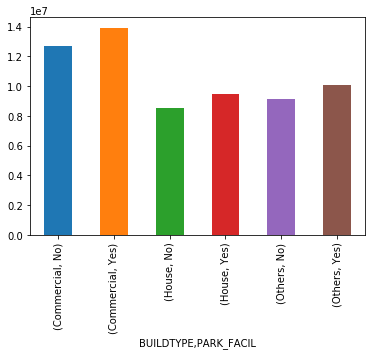

In [53]:
temp=data.groupby(["BUILDTYPE","PARK_FACIL"]).SALES_PRICE.median()
temp.plot.bar()